In [2]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [3]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_cleaned = pd.read_csv(os.path.join(ROOT_DIR, "train_cleaned.csv"))
train_cleaned

Equipment_Dam Model.Suffix  CURE END POSITION X Collect Result_Dam  \
0      Dam dispenser #1  AJX75334505                                   240.0   
1      Dam dispenser #2  AJX75334501                                  1000.0   
2      Dam dispenser #1  AJX75334501                                   240.0   
3      Dam dispenser #2  AJX75334501                                  1000.0   
4      Dam dispenser #2  AJX75334501                                  1000.0   
...                 ...          ...                                     ...   
40501  Dam dispenser #1  AJX75334501                                   240.0   
40502  Dam dispenser #1  AJX75334501                                   240.0   
40503  Dam dispenser #1  AJX75334501                                   240.0   
40504  Dam dispenser #2  AJX75334501                                  1000.0   
40505  Dam dispenser #1  AJX75334501                                   240.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                         2.5                            100   
1                                        12.5                             85   
2                                         2.5                             70   
3                                        12.5                             70   
4                                        12.5                             85   
...                                       ...                            ...   
40501                                     2.5                             70   
40502                                     2.5                             70   
40503                                     2.5                             70   
40504                                    12.5                             70   
40505                                     2.5                             70   

       CURE START POSITION X Collect Result_Dam  \
0                                          1030   
1                                           280   
2                                          1030   
3                                           280   
4                                           280   
...                                         ...   
40501                                      1030   
40502                                      1030   
40503                                      1030   
40504                                       280   
40505                                      1030   

       CURE START POSITION Θ Collect Result_Dam  \
0                                           -90   
1                                            90   
2                                           -90   
3                                            90   
4                                            90   
...                                         ...   
40501                                       -90   
40502                                       -90   
40503                                       -90   
40504                                        90   
40505                                       -90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
0                                                16   
1                                                16   
2                                                16   
3                                                16   
4                                                16   
...                                             ...   
40501                                            10   
40502                                            10   
40503                                            10   
40504                                            10   
40505                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
0                                                   14.9     
1                                                   14.7     
2              

In [4]:
# equip2 인 행만 추출
equip2 = train_cleaned[
    (train_cleaned['Equipment_Dam'] == 'Dam dispenser #2') &
    (train_cleaned['Equipment_Fill1'] == 'Fill1 dispenser #2') &
    (train_cleaned['Equipment_Fill2'] == 'Fill2 dispenser #2')
]

equip2

Equipment_Dam Model.Suffix  CURE END POSITION X Collect Result_Dam  \
1      Dam dispenser #2  AJX75334501                                  1000.0   
3      Dam dispenser #2  AJX75334501                                  1000.0   
4      Dam dispenser #2  AJX75334501                                  1000.0   
5      Dam dispenser #2  AJX75334501                                  1000.0   
6      Dam dispenser #2  AJX75334501                                  1000.0   
...                 ...          ...                                     ...   
40491  Dam dispenser #2  AJX75334501                                  1000.0   
40493  Dam dispenser #2  AJX75334502                                  1000.0   
40496  Dam dispenser #2  AJX75334501                                  1000.0   
40498  Dam dispenser #2  AJX75334501                                  1000.0   
40504  Dam dispenser #2  AJX75334501                                  1000.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
1                                        12.5                             85   
3                                        12.5                             70   
4                                        12.5                             85   
5                                        12.5                             70   
6                                        12.5                             70   
...                                       ...                            ...   
40491                                    12.5                             70   
40493                                    12.5                             70   
40496                                    12.5                             70   
40498                                    12.5                             70   
40504                                    12.5                             70   

       CURE START POSITION X Collect Result_Dam  \
1                                           280   
3                                           280   
4                                           280   
5                                           280   
6                                           280   
...                                         ...   
40491                                       280   
40493                                       280   
40496                                       280   
40498                                       280   
40504                                       280   

       CURE START POSITION Θ Collect Result_Dam  \
1                                            90   
3                                            90   
4                                            90   
5                                            90   
6                                            90   
...                                         ...   
40491                                        90   
40493                                        90   
40496                                        90   
40498                                        90   
40504                                        90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
1                                                16   
3                                                16   
4                                                16   
5                                                16   
6                                                10   
...                                             ...   
40491                                            10   
40493                                            10   
40496                                            10   
40498                                            10   
40504                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
1                                                   14.7     
3                                                   13.2     
4              

In [5]:
# 범주형 제거
columns_to_drop = [
    'Model.Suffix', 'Equipment_Dam', 'Chamber Temp. Judge Value_AutoClave',
    'Equipment_Fill1', 'Equipment_Fill2',
    
    'PalletID Collect Result_Dam', 'Receip No Collect Result_Dam',
    'PalletID Collect Result_Fill1', 'Receip No Collect Result_Fill1',
    'PalletID Collect Result_Fill2', 'Receip No Collect Result_Fill2'
]

# 열 삭제
equip2 = equip2.drop(columns=columns_to_drop)

# 결과 확인
equip2

CURE END POSITION X Collect Result_Dam  \
1                                      1000.0   
3                                      1000.0   
4                                      1000.0   
5                                      1000.0   
6                                      1000.0   
...                                       ...   
40491                                  1000.0   
40493                                  1000.0   
40496                                  1000.0   
40498                                  1000.0   
40504                                  1000.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
1                                        12.5                             85   
3                                        12.5                             70   
4                                        12.5                             85   
5                                        12.5                             70   
6                                        12.5                             70   
...                                       ...                            ...   
40491                                    12.5                             70   
40493                                    12.5                             70   
40496                                    12.5                             70   
40498                                    12.5                             70   
40504                                    12.5                             70   

       CURE START POSITION X Collect Result_Dam  \
1                                           280   
3                                           280   
4                                           280   
5                                           280   
6                                           280   
...                                         ...   
40491                                       280   
40493                                       280   
40496                                       280   
40498                                       280   
40504                                       280   

       CURE START POSITION Θ Collect Result_Dam  \
1                                            90   
3                                            90   
4                                            90   
5                                            90   
6                                            90   
...                                         ...   
40491                                        90   
40493                                        90   
40496                                        90   
40498                                        90   
40504                                        90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
1                                                16   
3                                                16   
4                                                16   
5                                                16   
6                                                10   
...                                             ...   
40491                                            10   
40493                                            10   
40496                                            10   
40498                                            10   
40504                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
1                                                   14.7     
3                                                   13.2     
4                                                   14.7     
5                                                   13.2     
6                                                   21.3     
...                                                  ...     
40491                                               17.0     
40493                                               21.3     
40496       

In [22]:
equip2['CURE END POSITION X Collect Result_Dam'].unique()

array([1000.])

### Equip2_All

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Dam이라는 이름이 포함된 열들만 필터링하고 복사본 생성
dam_columns = equip2.filter(like='Dam').copy()
print(len(dam_columns.columns))

# target 열을 1과 0으로 인코딩
dam_columns['target'] = equip2['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = dam_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.title('Correlation Heatmap for Dam Columns_Equip2')
plt.show()


# 상관계수 상위 5개 추출
corr_unstacked = correlation_matrix.abs().unstack().sort_values(ascending=False)
corr_unstacked = corr_unstacked[corr_unstacked != 1]  # 자기 자신과의 상관관계 제외

top_5_corr = corr_unstacked.drop_duplicates().head(5)
print("상위 5개의 상관관계:")
print(top_5_corr)

38


상위 5개의 상관관계:
Stage2 Line2 Distance Speed Collect Result_Dam            Stage2 Circle1 Distance Speed Collect Result_Dam            0.999985
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam  HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam    0.999971
Stage1 Circle1 Distance Speed Collect Result_Dam          Stage3 Circle1 Distance Speed Collect Result_Dam            0.999742
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam         0.999553
Dispense Volume(Stage3) Collect Result_Dam                Dispense Volume(Stage1) Collect Result_Dam                  0.999530
dtype: float64


19


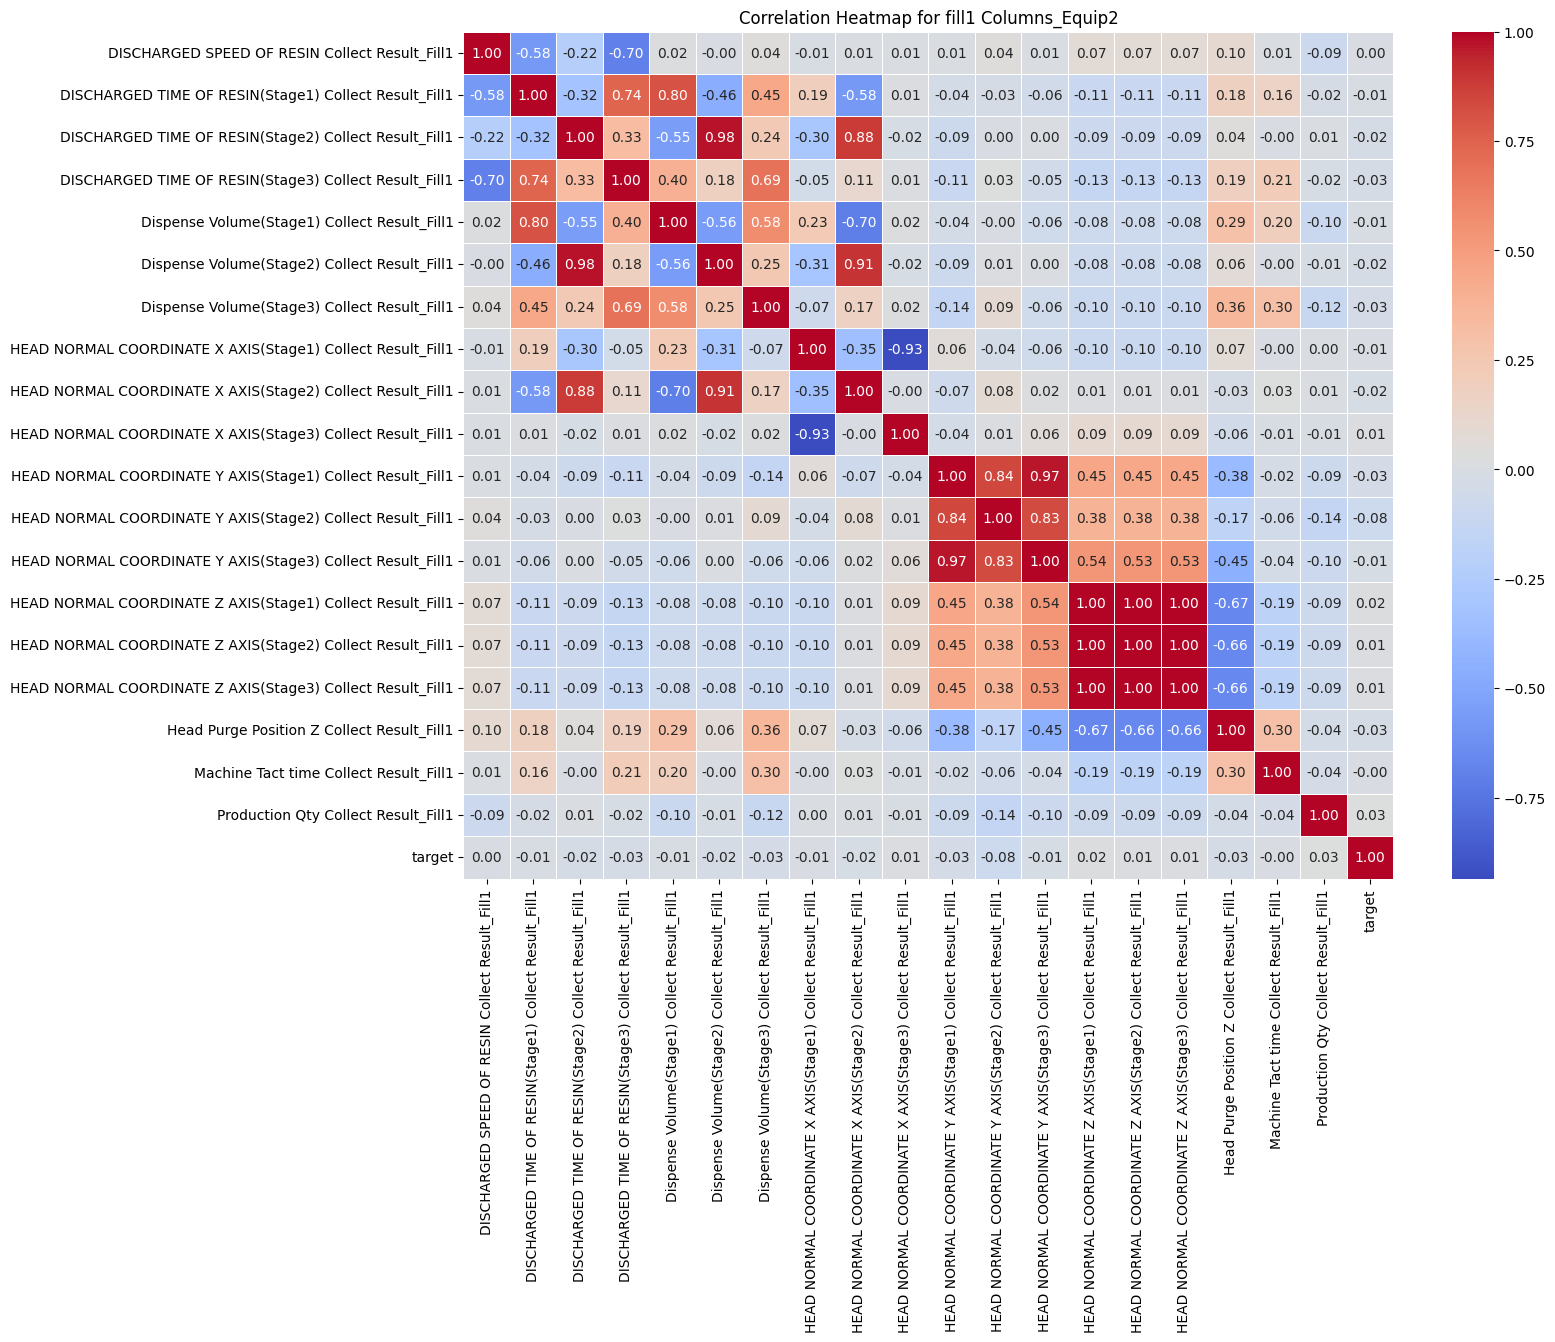

In [32]:
fill1_columns = equip2.filter(like = 'Fill1').copy()
print(len(fill1_columns.columns))

# target 열을 1과 0으로 인코딩
fill1_columns['target'] = equip2['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = fill1_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for fill1 Columns_Equip2')
plt.show()

14


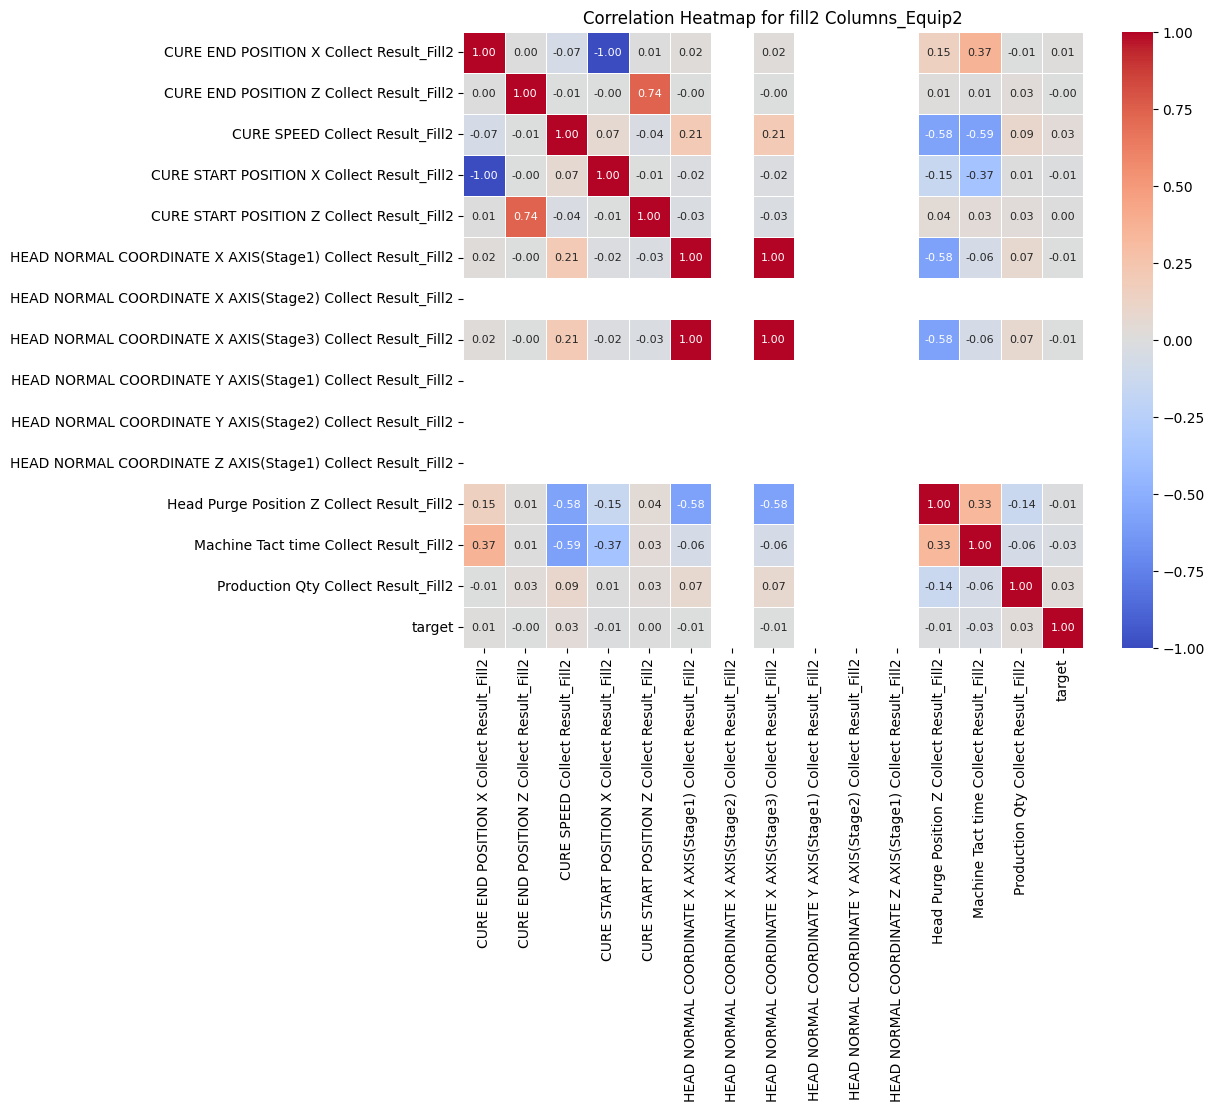

In [31]:
fill2_columns = equip2.filter(like = 'Fill2').copy()
print(len(fill2_columns.columns))

# target 열을 1과 0으로 인코딩
fill2_columns['target'] = equip2['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = fill2_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for fill2 Columns_Equip2')
plt.show()

8


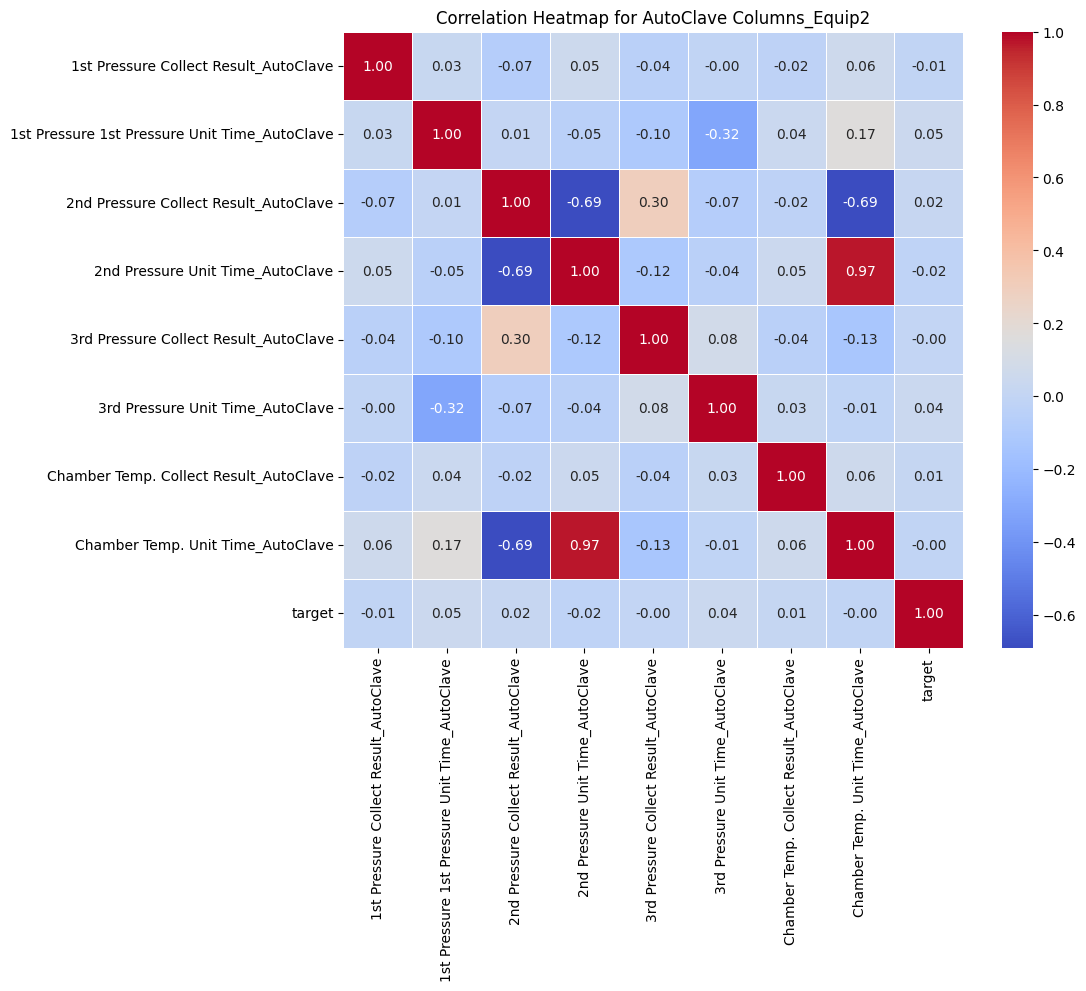

In [34]:
auto_columns = equip2.filter(like = 'AutoClave').copy()
print(len(auto_columns.columns))

# target 열을 1과 0으로 인코딩
auto_columns['target'] = equip2['target'].map({'Normal': 1, 'AbNormal': 0})

# 상관관계 행렬 계산
correlation_matrix = auto_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for AutoClave Columns_Equip2')
plt.show()

### Equip2_Normal

In [35]:
# target이 'normal'인 행만 필터링
equip2_normal = equip2[equip2['target'] == 'Normal']

# 필터링된 데이터프레임 크기 확인
print(f"'target'이 'normal'인 행의 개수: {len(equip2_normal)}")

equip2_normal

'target'이 'normal'인 행의 개수: 14611


CURE END POSITION X Collect Result_Dam  \
1                                      1000.0   
3                                      1000.0   
4                                      1000.0   
5                                      1000.0   
6                                      1000.0   
...                                       ...   
40490                                  1000.0   
40491                                  1000.0   
40496                                  1000.0   
40498                                  1000.0   
40504                                  1000.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
1                                        12.5                             85   
3                                        12.5                             70   
4                                        12.5                             85   
5                                        12.5                             70   
6                                        12.5                             70   
...                                       ...                            ...   
40490                                    12.5                             70   
40491                                    12.5                             70   
40496                                    12.5                             70   
40498                                    12.5                             70   
40504                                    12.5                             70   

       CURE START POSITION X Collect Result_Dam  \
1                                           280   
3                                           280   
4                                           280   
5                                           280   
6                                           280   
...                                         ...   
40490                                       280   
40491                                       280   
40496                                       280   
40498                                       280   
40504                                       280   

       CURE START POSITION Θ Collect Result_Dam  \
1                                            90   
3                                            90   
4                                            90   
5                                            90   
6                                            90   
...                                         ...   
40490                                        90   
40491                                        90   
40496                                        90   
40498                                        90   
40504                                        90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
1                                                16   
3                                                16   
4                                                16   
5                                                16   
6                                                10   
...                                             ...   
40490                                            10   
40491                                            10   
40496                                            10   
40498                                            10   
40504                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
1                                                   14.7     
3                                                   13.2     
4                                                   14.7     
5                                                   13.2     
6                                                   21.3     
...                                                  ...     
40490                                               17.0     
40491                                               17.0     
40496       

38


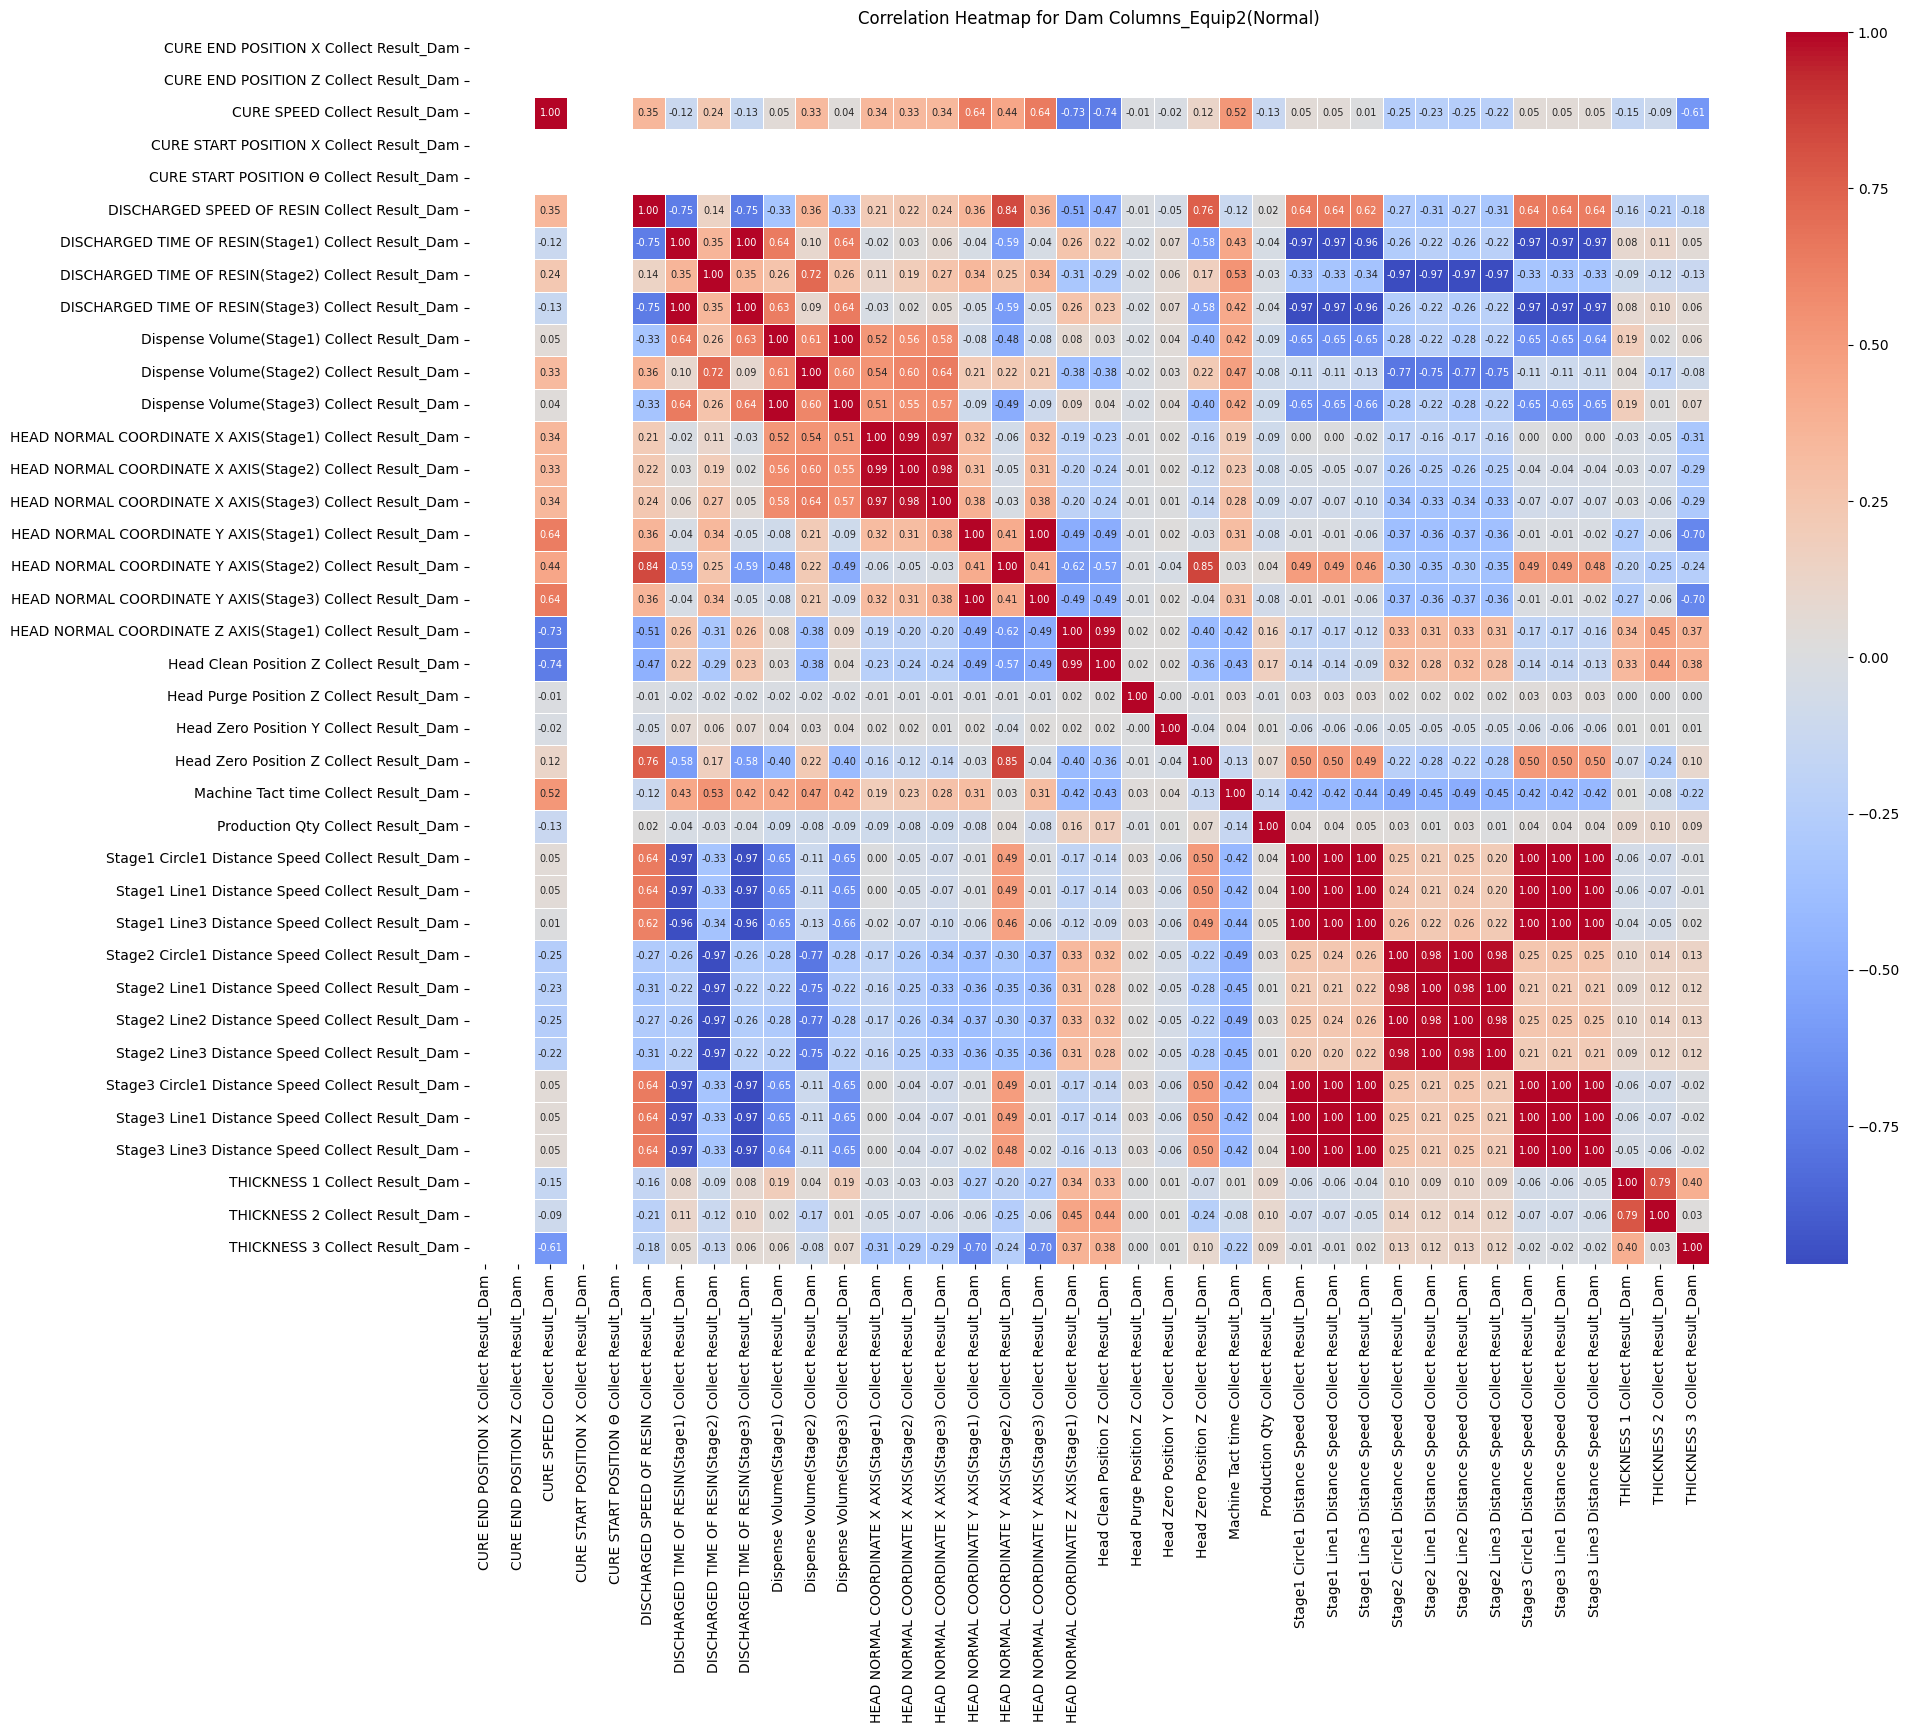

In [36]:
# Dam이라는 이름이 포함된 열들만 필터링하고 복사본 생성
dam_columns = equip2_normal.filter(like='Dam').copy()
print(len(dam_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = dam_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.title('Correlation Heatmap for Dam Columns_Equip2(Normal)')
plt.show()

19


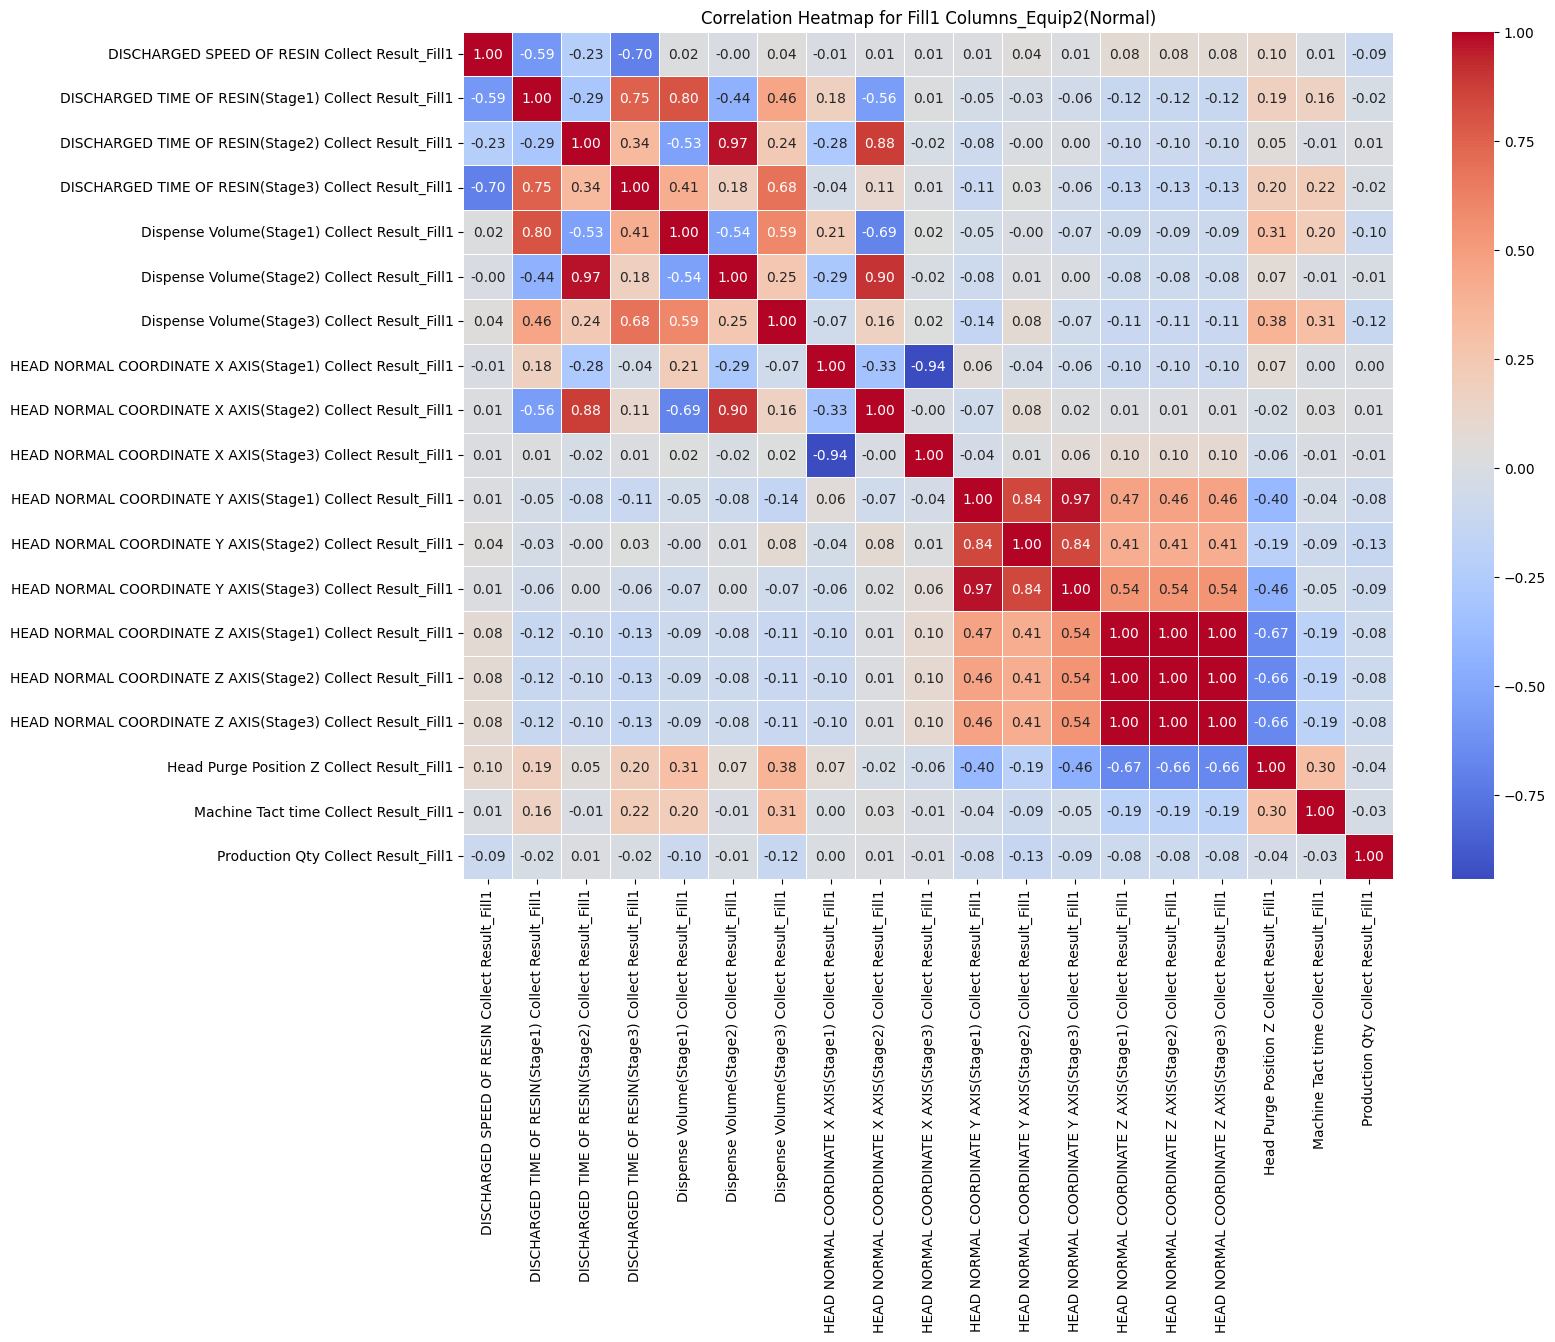

In [37]:
fill1_columns = equip2_normal.filter(like='Fill1').copy()
print(len(fill1_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill1_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for Fill1 Columns_Equip2(Normal)')
plt.show()

14


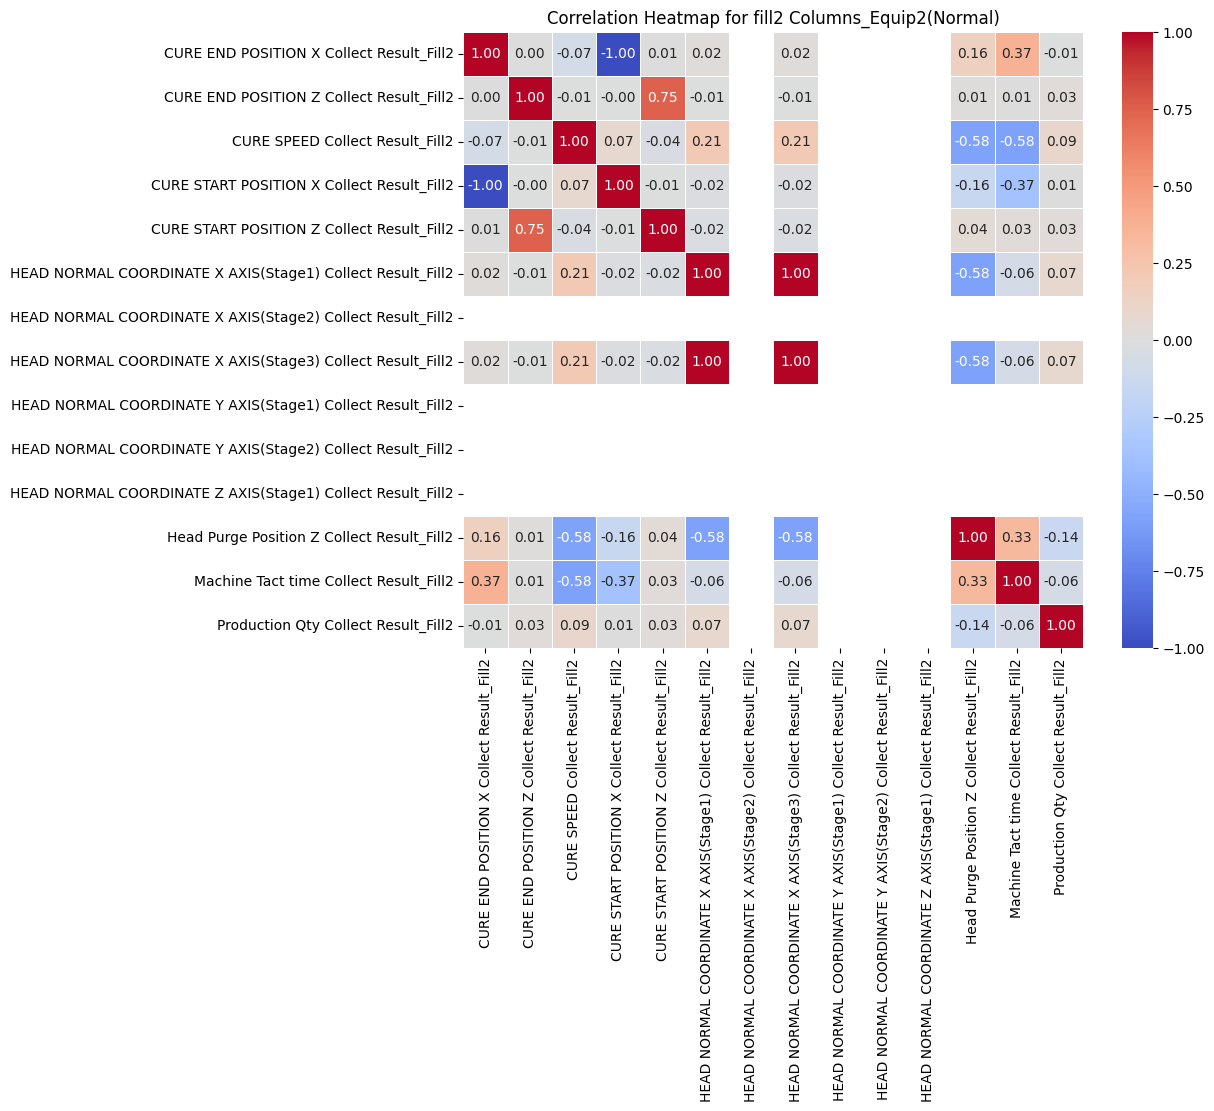

In [38]:
fill2_columns = equip2_normal.filter(like = 'Fill2').copy()
print(len(fill2_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill2_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for fill2 Columns_Equip2(Normal)')
plt.show()

8


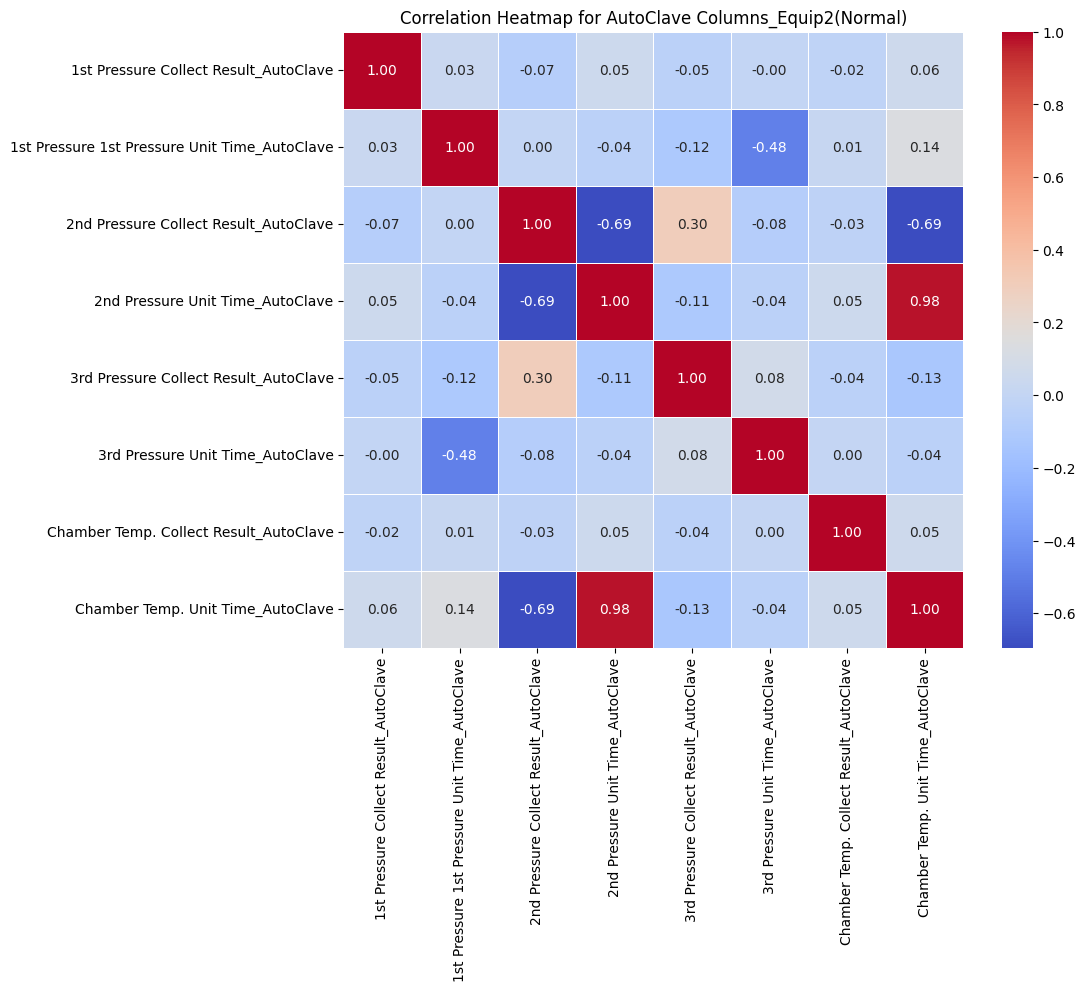

In [39]:
auto_columns = equip2_normal.filter(like = 'AutoClave').copy()
print(len(auto_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = auto_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for AutoClave Columns_Equip2(Normal)')
plt.show()

### Equip2_AbNormal

In [15]:
# target이 'Abnormal'인 행만 필터링
equip2_abnormal = equip2[equip2['target'] == 'AbNormal']

# 필터링된 데이터프레임 크기 확인
print(f"'target'이 'abnormal'인 행의 개수: {len(equip2_abnormal)}")

equip2_abnormal

'target'이 'abnormal'인 행의 개수: 850


CURE END POSITION X Collect Result_Dam  \
90                                     1000.0   
170                                    1000.0   
216                                    1000.0   
254                                    1000.0   
304                                    1000.0   
...                                       ...   
40302                                  1000.0   
40339                                  1000.0   
40410                                  1000.0   
40438                                  1000.0   
40493                                  1000.0   

       CURE END POSITION Z Collect Result_Dam  CURE SPEED Collect Result_Dam  \
90                                       12.5                            100   
170                                      12.5                             70   
216                                      12.5                             70   
254                                      12.5                             85   
304                                      12.5                             70   
...                                       ...                            ...   
40302                                    12.5                             70   
40339                                    12.5                             70   
40410                                    12.5                             70   
40438                                    12.5                             70   
40493                                    12.5                             70   

       CURE START POSITION X Collect Result_Dam  \
90                                          280   
170                                         280   
216                                         280   
254                                         280   
304                                         280   
...                                         ...   
40302                                       280   
40339                                       280   
40410                                       280   
40438                                       280   
40493                                       280   

       CURE START POSITION Θ Collect Result_Dam  \
90                                           90   
170                                          90   
216                                          90   
254                                          90   
304                                          90   
...                                         ...   
40302                                        90   
40339                                        90   
40410                                        90   
40438                                        90   
40493                                        90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
90                                               16   
170                                              16   
216                                              16   
254                                              16   
304                                              16   
...                                             ...   
40302                                            10   
40339                                            10   
40410                                            10   
40438                                            10   
40493                                            10   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
90                                                  14.9     
170                                                 13.2     
216                                                 13.2     
254                                                 14.7     
304                                                 13.2     
...                                                  ...     
40302                                               17.0     
40339                                               21.3     
40410       

38


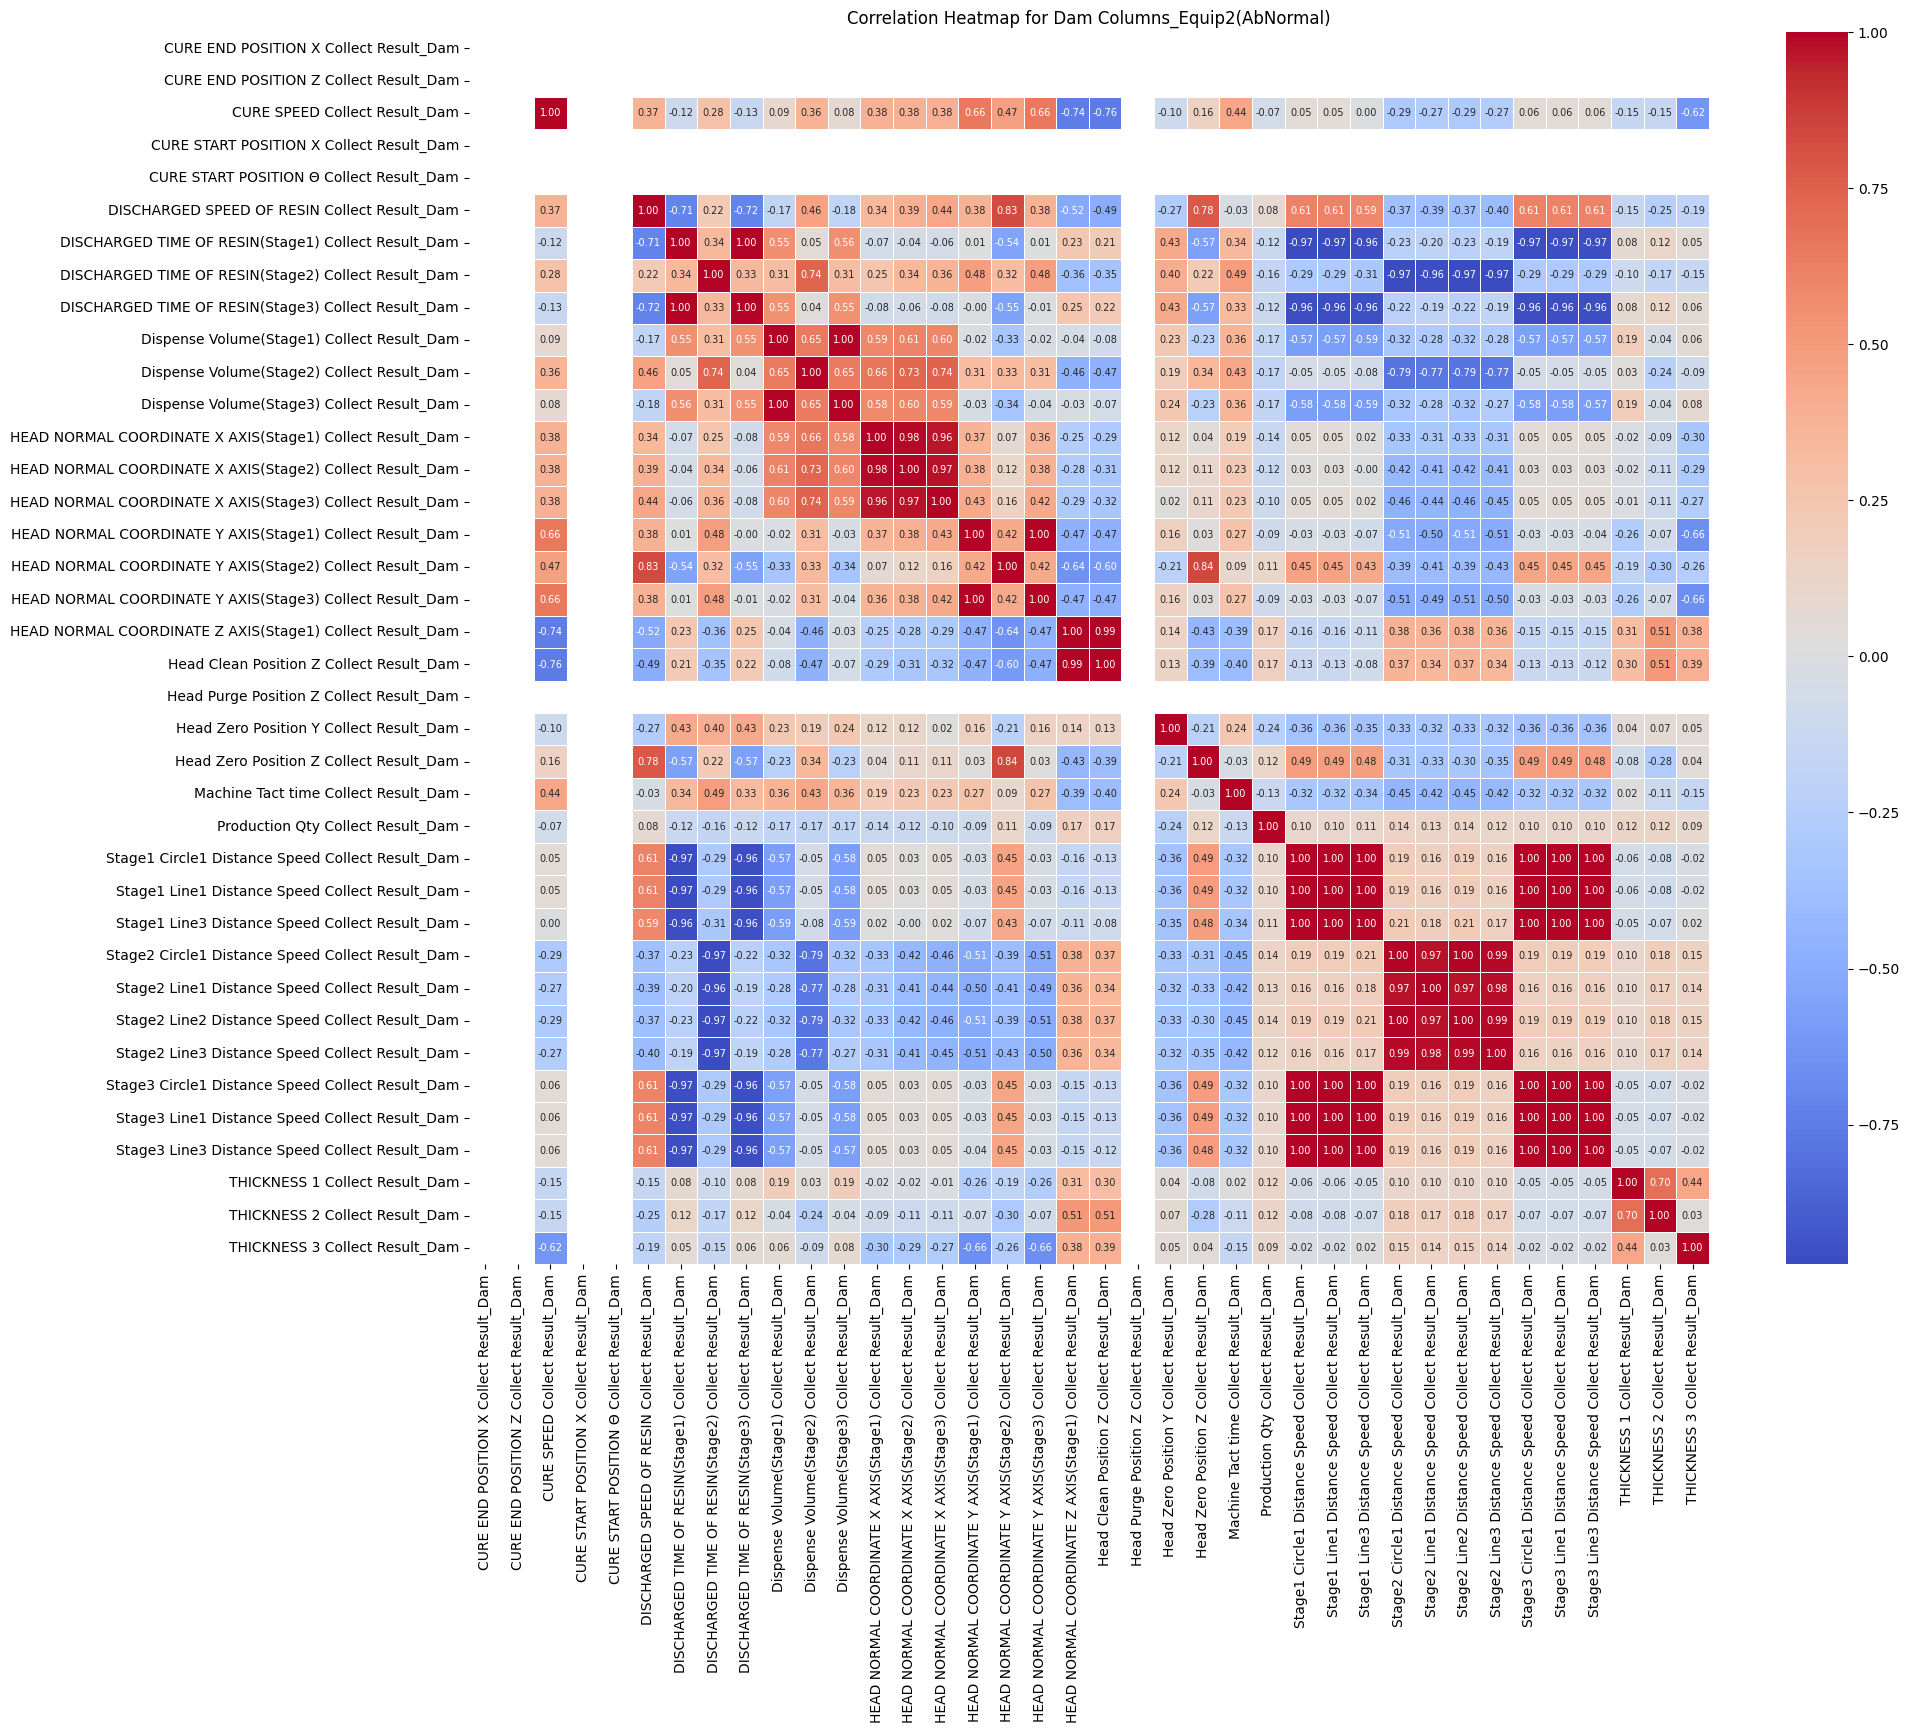

In [40]:
# Dam이라는 이름이 포함된 열들만 필터링하고 복사본 생성
dam_columns = equip2_abnormal.filter(like='Dam').copy()
print(len(dam_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = dam_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 7})
plt.title('Correlation Heatmap for Dam Columns_Equip2(AbNormal)')
plt.show()

In [41]:
fill1_columns = equip2_abnormal.filter(like='Fill1').copy()
print(len(fill1_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill1_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(15, 11))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for Fill1 Columns_Equip2(AbNormal)')
plt.show()

19


14


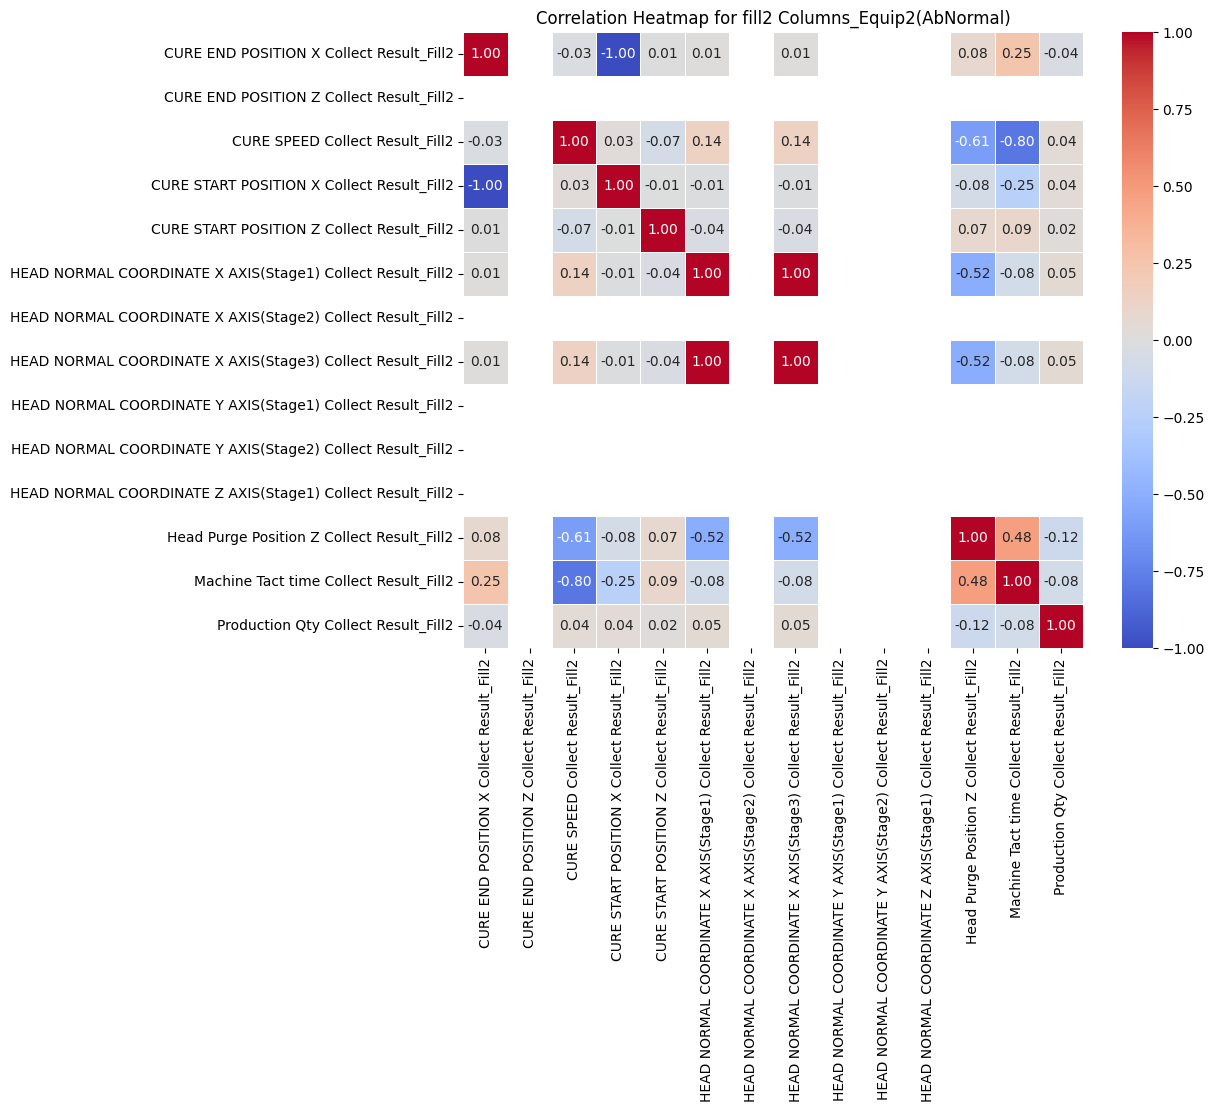

In [42]:
fill2_columns = equip2_abnormal.filter(like = 'Fill2').copy()
print(len(fill2_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = fill2_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for fill2 Columns_Equip2(AbNormal)')
plt.show()

8


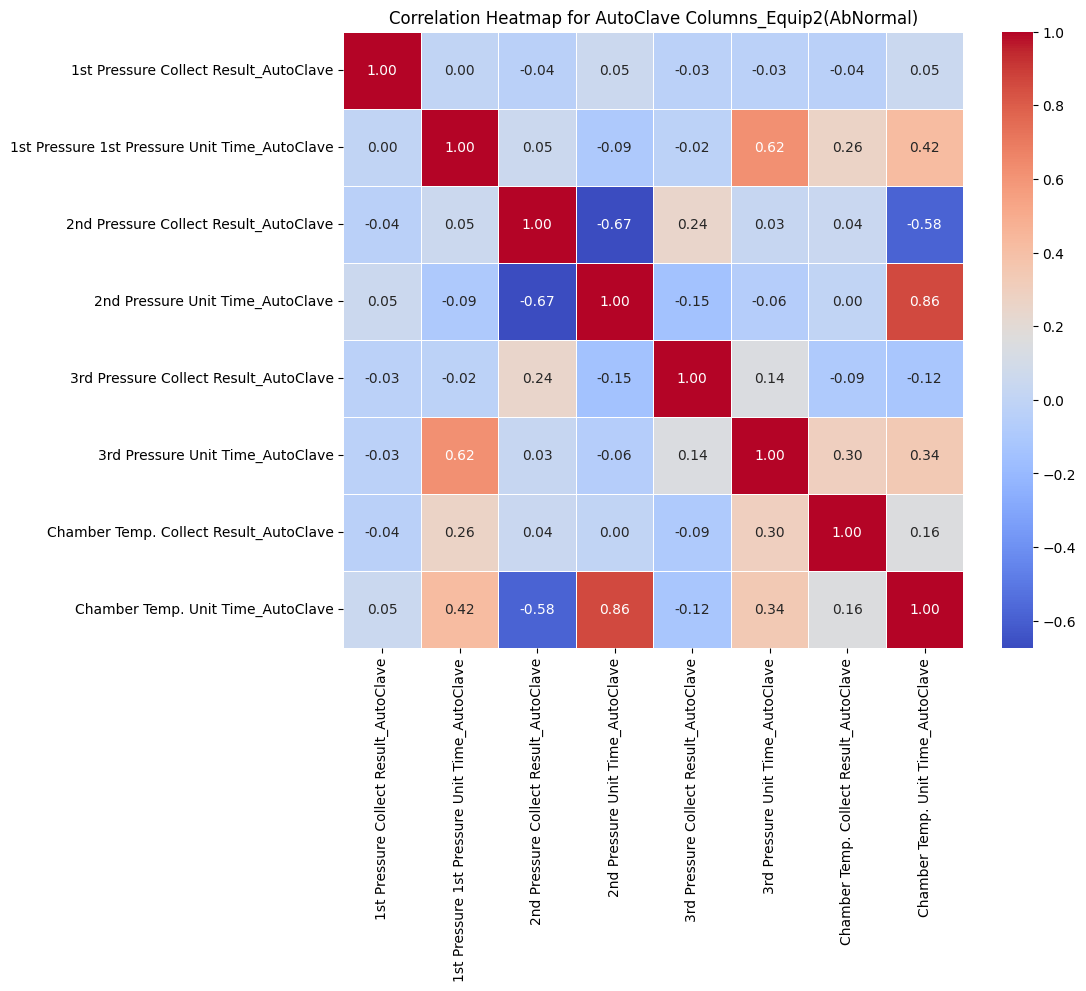

In [43]:
auto_columns = equip2_abnormal.filter(like = 'AutoClave').copy()
print(len(auto_columns.columns))

# 상관관계 행렬 계산
correlation_matrix = auto_columns.corr()

# 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title('Correlation Heatmap for AutoClave Columns_Equip2(AbNormal)')
plt.show()